# Exploring network constraints on concentration dynamics

### Semidán Robaina Estévez

Reaction networks are models of (bio)chemical systems in which chemical species are interconverted through the action of chemical reactions. Typically, a reaction network is represented by its stoichiometrix matrix $S$, in which each entry $s_{ij}$ denotes the stoichiometric coefficients with which species $i$ participates in reaction $j$ &mdash; negative coefficients are assigned to substrates of the reaction, while positive to products. Since most species only participate in a small set of reactions, $S$ is typically sparse.

Suppose that we are interested in evaluating the concentration dynamics of the chemical species in a homogeneous chemical system. We can model that with a system of ordinary differential equations:

\begin{equation}
  \frac{d}{dt} x_i = \sum_j s_{ij} v_j,
\label{eq:1}
\tag{1}
\end{equation}

with $x_i$ representing the concentration of species $i$ and $v_j$ the flux through reaction $j$. However, to this end, we need to assign a reaction kinetic to the system. The simplest reaction kinetic is the [Mass Action Kinetic](https://en.wikipedia.org/wiki/Law_of_mass_action), which models a homogeneous, no enzymatically catalyzed system:

\begin{equation}
  v_j = k_j \prod_{i\in Subs} x_i^{s_{ij}}.
  \label{eq:2}
  \tag{2}
\end{equation}

That is, the flux $v_j$ through a reaction is modelled as a monomial on the concentrations of the reaction substrates. Parameter $k_j$, the reaction rate constant, captures the speed at which the reaction takes place given fixed substrate concentatrions. There are, however, other reaction kinetics, such as the [Michaelis-Menten formalism](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) and its variants, which model enzyme-catalyzed reactions.

Reaction kinetics are crucial to investigate chemical dynamics. Unfortunately, the parameterization of such systems is not straighforward. Oftentimes, a large fraction of parameter values are not accessible, which makes their investigation complicated. However, in such escenarios, it may still be possible to evaluate how network and stoichiometric constraints affect concentration dynamics. Specifically, we can apply [constraint-based modeling techniques](https://en.wikipedia.org/wiki/Metabolic_network_modelling) to the linear system in eq \ref{eq:1}.

In constraint-based metabolic modeling, a steady-state scenario is typically assumed, i.e, we have $Sv=0$. Thus, we can only interrogate the space of steady-state flux values for all reactions in a system. For instance, the most popular constraint-based metabolic modeling method is the so-called Flux Balance Analysis, which typically solves the following Linear Program (LP):

\begin{align}
  \begin{aligned}
    &\max_v c^T v
    \\
    &\mathrm{s.t.}
    \\
    &Sv=0
    \\
    &v_{min} \le v \le v_{max}.
  \end{aligned}
\label{eq:3}
\tag{3}
\end{align}

In eq \ref{eq:3} a linear function of the reaction fluxes $v$ is optimized over the feasible space corresponding to the system at steady state with some boundary conditions on the reaction fluxes. However, there is nothing preventing us from exploring the feasible space around the steady state condition, i.e., using the constraint $\dot x_{min} \le Sv \le \dot x_{max}$ in which the dot notation represents the first derivative. Moreover, we can discretize time and define $x_{t+1} = x_t + \dot x_t$ for each fixed time period $t$. Hence, we could define variables $x_t$ representing the concentrations of chemical species at each time step, $t \in {0,\dots,n}$. This way, we would be able to explore the feasible space of concentration values of our system in eq \ref{eq:1}, provided suitable bounds are given for each variable and, of course, only for a time-discretized system.

Putting together the previous ideas, we arrive at the LP:

\begin{align}
  \begin{aligned}
    &Z = \max_{v_t,\dot x_t,x_t} \sum_{t\,=\,0}^{t_f}\phi(x_t)
    \\
    &\mathrm{s.t.}
    \\
    &1.\;Sv_t = \dot x_t
    \\
    &2.\;x_{t+1} = x_t + \dot x_t
    \\
    &3.\;v^{lb}_t \leq v_t \leq v^{ub}_t
    \\
    &4.\;\dot x^{lb}_t \leq \dot x_t \leq \dot x^{ub}_t
    \\
    &5.\;x_t \geq 0
    \\
    &t = \{0,\dots,t_f\}.
  \end{aligned}
  \label{eq:4}
  \tag{4}
\end{align}

In LP \ref{eq:4}, we maximize the sum of linear function of the concentrations, $x_t$, over all time steps $t$. For instance, we could maximize the total concentration of chemical species $x_{it}$ over all time steps, i.e., the discrete equivalent of the integral over the time period. However, we can modify the objective function at our convinience. Note that we impose bounds on the derivatives at each time step, $\dot x_t$. These constraints are crucial to render the feasible space of LP \ref{eq:4} realistic, i.e., constraining the increase or decrease in concentration that the system can maintain in each time step. To further render the feasible space more realistic, we can add a constraint to control the change in flux values between time steps: $v_{t + 1} = v_t + \delta$, with $\delta_{min} \leq \delta \leq \delta_{max}$. In this manner, we impose a notion of continuity between time steps, avoiding large jumps in flux values between time steps.

### Exploring the optimal space of concentration dynamics
Solving LP \ref{eq:4} will render a single optimal solution. However, the system will most likely be proned to host a space of alternative optimal solutions, a situaltion that is common in constraint-based metabolic modeling setups. We can explore the space of alternative optimal concentration trajectories in two ways. On the one hand, we can compute the minimum and maximum concentration values for each chemical species along the trajectory. On the other hand, we can randomly sample the space of alternative optimal concentration trajectories, e.g, to conduct statistical analyses on them.

First, let's adapt LP \ref{eq:4} to compute the concentration bounds along the trajectory. Specifically, we need to solve the following two LPs for each $x_{it},\;i\in \{1,\dots,m\},\;t\in\{t_0,\dots,t_f\}$ to compute the maximum and minimum concentrations for each time step:

\begin{align}
  \begin{aligned}
    & x^{\mathrm{min}}_{it},\; x^{\mathrm{max}}_{it} = \min_{v_t,\dot x_t,x_t} x_{it}, \;\max_{v_t,\dot x_t,x_t} x_{it}
    \\
    &\mathrm{s.t.}
    \\
    &1.\;Sv_t = \dot x_t
    \\
    &2.\;x_{t+1} = x_t + \dot x_t
    \\
    &3.\;v^{lb}_t \leq v_t \leq v^{ub}_t
    \\
    &4.\;\dot x^{lb}_t \leq \dot x_t \leq \dot x^{ub}_t
    \\
    &5.\;x_t \geq 0
    \\
    &6.\;\sum_{t\,=\,0}^{t_f}\phi(x_t) = Z
    \\
    &t = \{0,...,t_f\},
  \end{aligned}
  \label{eq:5}
  \tag{5}
\end{align}

where $Z$ corresponds to the optimal value of the objective function in LP \ref{eq:4}. Now that we can compute the concentration bounds in the optimal solution space, we can proceed to generate a random sample of optimal concentration trajectories. To this end, we first generate a random vector of concentration trajectories, $x_{\mathrm{rand}}$, and then find the closest point in the optimal soluction space. To this end, we can employ the first norm: $\epsilon = ||x - x_{\mathrm{rand}}||_1 = \sum_k |x_k - x_{\mathrm{rand}k}|$. However, to facilitate the computation, we will employ the transformation: $\epsilon^+ - \epsilon^- = ||x - x_{\mathrm{rand}}||_1$, with $\epsilon^+, \epsilon^- \ge 0$. The solution to the following LP generates a random trajectories which achieve the same optimal value, $Z$, of LP \ref{eq:4}:

\begin{align}
  \begin{aligned}
  &\min_{\substack{v_t,\dot x_t,x_t,\\ \epsilon_t^+,\epsilon_t^-}} \sum_{i=1}^{m} \sum_{t=0}^{t_f+1} (\epsilon_{it}^+ + \epsilon_{it}^-)
  \\
  &\mathrm{s.t.}
  \\
  &1.\;Sv_t = \dot x_t
  \\
  &2.\;x_{t+1} = x_t + \dot x_t
  \\
  &3.\;v^{lb}_t \leq v_t \leq v^{ub}_t
  \\
  &4.\;\dot x^{lb}_t \leq \dot x_t \leq \dot x^{ub}_t
  \\
  &5.\;x_t \geq 0
  \\
  &6.\;\sum_{t\,=\,0}^{t_f}\phi(x_t) = Z
  \\
  &7.\;x_{t} - x_{\mathrm{rand}_t} = \epsilon_{t}^+ - \epsilon_{t}^-
  \\
  &8.\;\epsilon_t^+,\;\epsilon_{t}^+ \geq 0
  \\
  &t = \{0,\dots,t_f\}.
  \end{aligned}
  \label{eq:6}
  \tag{6}
\end{align}

We just need to repeat the process of generating $x_{\mathrm{rand}}$ and solving LP \ref{eq:6} $n$ times to collect a sample of size $n$ of alternative optimal concentration trajectories for our chemical system.

### An illustration
Let's exemplify the methods presented in the previous section with the following chemical network:

<img alt="Fig1" src="fig1.png" style="max-width:500px;"/>

with chemical species, $A,B,C,D,E,F$ and reactions $v_1,v_2,v_3,v_4,v_5$, which has stoichiometric matrix:

$$S = 
\begin{pmatrix}
    -1 &  0 &  0 & -1 &  0\\
    -1 &  0 &  0 &  0 &  0\\
    2 & -1 &  1 &  0 & -1\\
    0 &  1 &  0 &  0 &  0\\
    0 &  0 & -1 &  1 &  1\\
    0 &  1 &  0 &  0 &  0\
\end{pmatrix}.$$

We will use LPs \ref{eq:4},\ref{eq:5},\ref{eq:6} to explore the alternative optimal space resulting from maximizing the total concentration, i.e., sum over all time steps, of species $C$.

In [1]:
import numpy as np
from trajectoryLP import NetworkFlow

In [2]:
S = np.array([
    [-1,0,0,-1,0],
    [-1,0,0,0,0],
    [2,-1,1,0,-1],
    [0,1,0,0,0],
    [0,0,-1,1,1],
    [0,1,0,0,0]
])

var_names = ['A', 'B', 'C', 'D', 'E', 'F']
flux_names=['v1', 'v2', 'v3', 'v4', 'v5']
# Define initial conditions
var_x0 = [10, 5, 5, 1, 2, 2]

Network = NetworkFlow(S, obj_x='C', n_steps=100, 
                      x_names=var_names, x_0=var_x0,
                      xp_min=-10, xp_max=10, v_names=flux_names, 
                      v_delta_max=0.1)

Network.solve(verbose=False)
Network.findAlternativeOptimaBounds()
Network.sampleAlternativeOptimaSpace(n_samples=500)

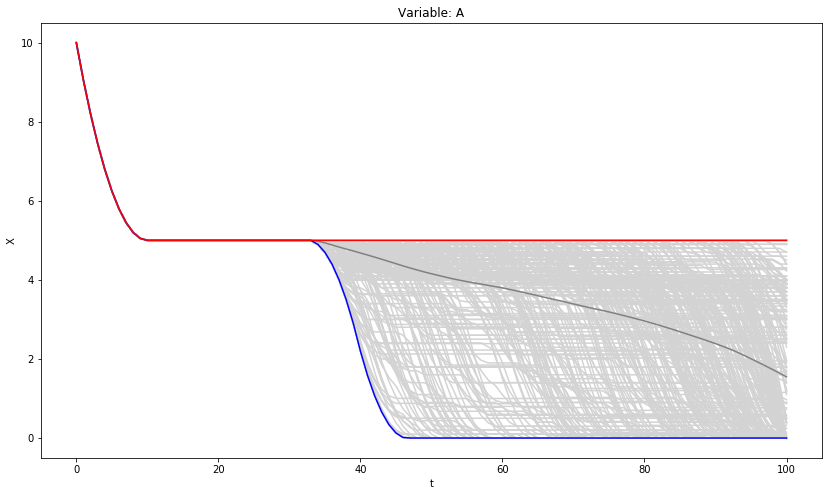

In [3]:
Network.plotXSolution('A')

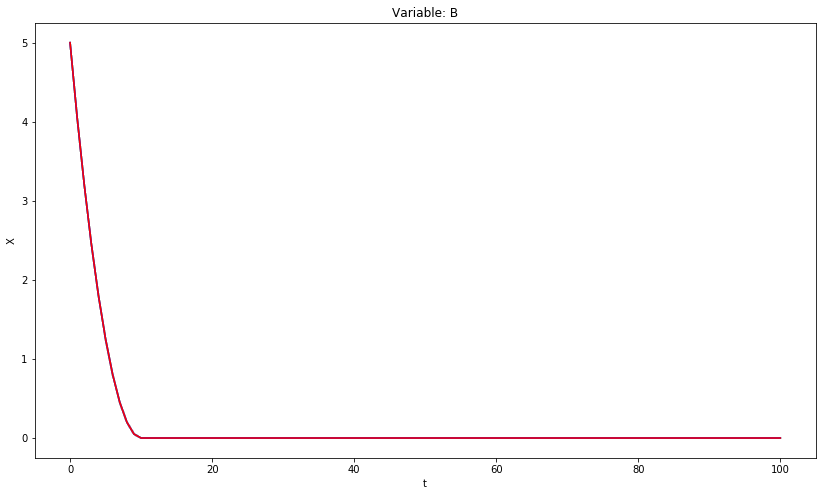

In [4]:
Network.plotXSolution('B')

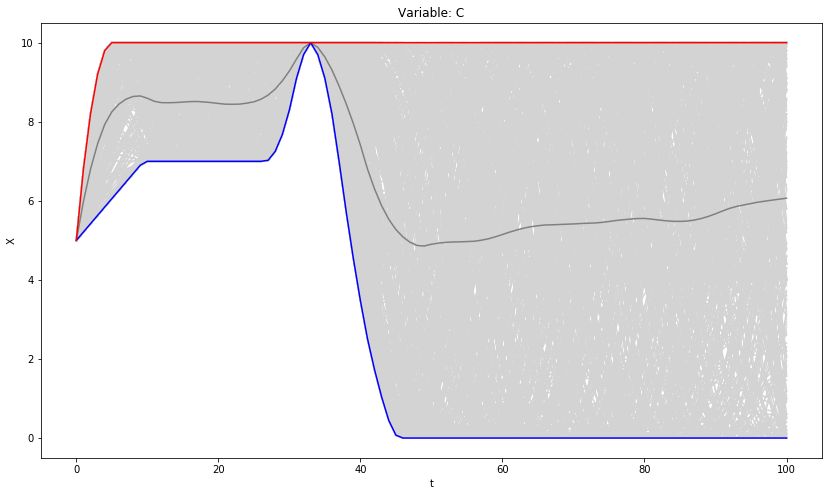

In [5]:
Network.plotXSolution('C')

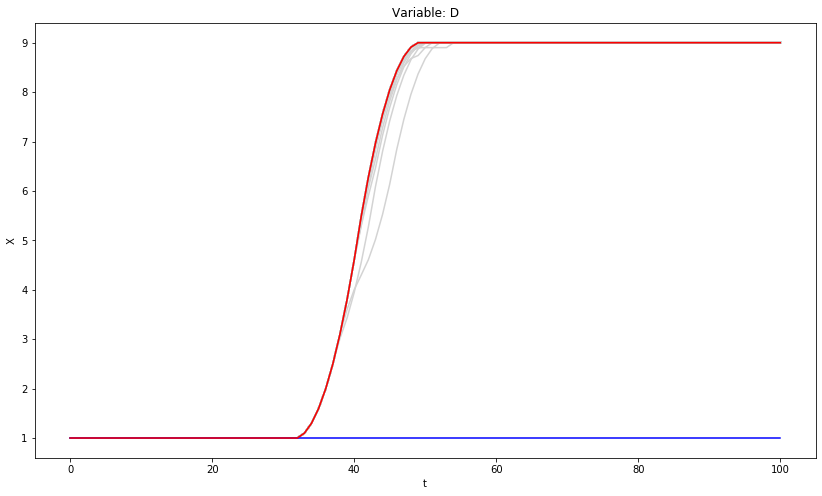

In [6]:
Network.plotXSolution('D')

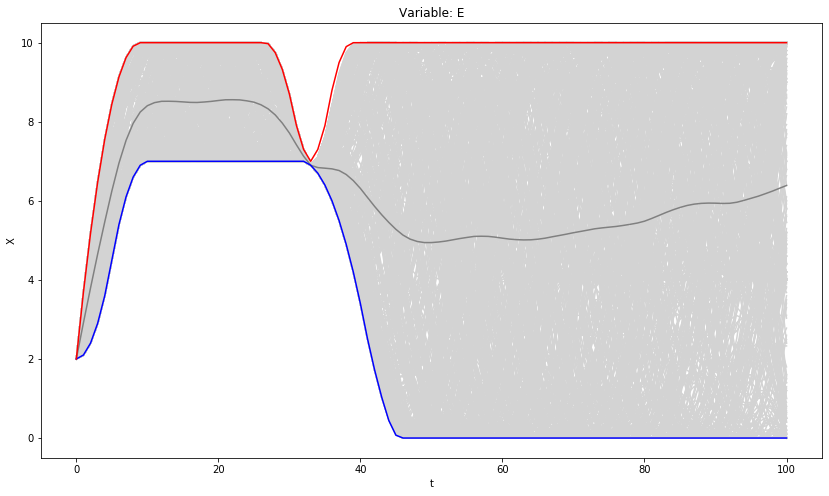

In [7]:
Network.plotXSolution('E')

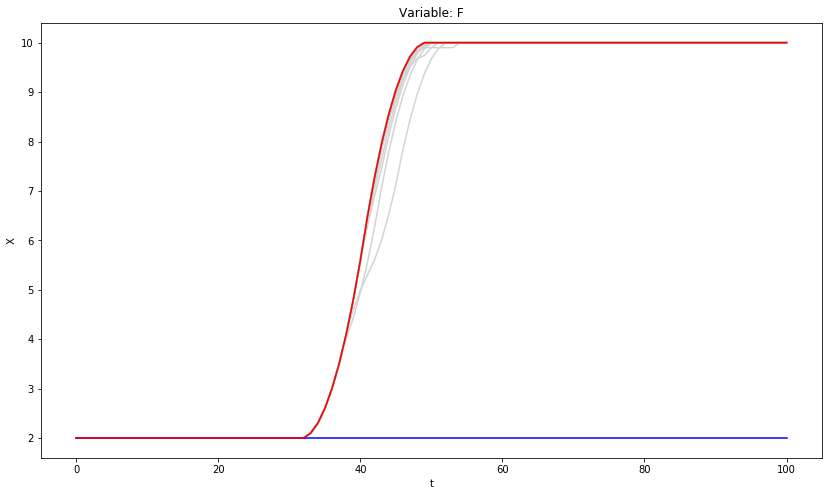

In [8]:
Network.plotXSolution('F')

### Results and Discussion

The figures above show the minimum and maximum concentration bounds, depicted in blue and red, respectively, as well as a random sample of optimal trajectories, light gray, and their average, dark gray, for all five chemical species in our example network &mdash; remember that in this esceneraio we were optimizing the sum over time steps of the concentration of species $C$.

We observe that some species show more constrained trajectories than others. Specifically, species $B$ is the most constrained, with a single optimal trajectory in the alternative optimal space. This single trajectory simply corresponds to the fastest allowed, that is, per our constraints, consumption, since $B$ is required to produce $C$ and it is only consumed, not produced, by the network. However, we see that the rest of species show different degrees of variability in their optimal trajectories &mdash; being $C, E$ the species displaying the most variable optimal trajectories.

### References